## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

In [5]:
"""
Compile 模型
"""
model.summary()

#optimizer = keras.optimizers.Adam(lr=0.001)
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 9s 174us/step - loss: 2.2682 - accuracy: 0.1563 - val_loss: 2.2231 - val_accuracy: 0.2009
Epoch 2/500
50000/50000 [==============================] - 8s 158us/step - loss: 2.1897 - accuracy: 0.2299 - val_loss: 2.1604 - val_accuracy: 0.2453
Epoch 3/500
50000/50000 [==============================] - 8s 161us/step - loss: 2.1325 - accuracy: 0.2575 - val_loss: 2.1100 - val_accuracy: 0.2673
Epoch 4/500
50000/50000 [==============================] - 8s 151us/step - loss: 2.0869 - accuracy: 0.2736 - val_loss: 2.0697 - val_accuracy: 0.2774
Epoch 5/500
50000/50000 [==============================] - 8s 155us/step - loss: 2.0498 - accuracy: 0.2862 - val_loss: 2.0361 - val_accuracy: 0.2912
Epoch 6/500
50000/50000 [==============================] - 7s 143us/step - loss: 2.0190 - accuracy: 0.2972 - val_loss: 2.0078 - val_accuracy: 0.2970
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 7s 140us/step - loss: 1.6583 - accuracy: 0.4253 - val_loss: 1.6662 - val_accuracy: 0.4232
Epoch 56/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.6551 - accuracy: 0.4262 - val_loss: 1.6632 - val_accuracy: 0.4209
Epoch 57/500
50000/50000 [==============================] - 7s 147us/step - loss: 1.6520 - accuracy: 0.4272 - val_loss: 1.6598 - val_accuracy: 0.4223
Epoch 58/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.6487 - accuracy: 0.4288 - val_loss: 1.6568 - val_accuracy: 0.4223
Epoch 59/500
50000/50000 [==============================] - 8s 154us/step - loss: 1.6454 - accuracy: 0.4306 - val_loss: 1.6542 - val_accuracy: 0.4258
Epoch 60/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.6427 - accuracy: 0.4303 - val_loss: 1.6499 - val_accuracy: 0.4276
Epoch 61/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.6398 - accuracy: 0.4315 - val

50000/50000 [==============================] - 7s 148us/step - loss: 1.5253 - accuracy: 0.4712 - val_loss: 1.5496 - val_accuracy: 0.4596
Epoch 110/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.5234 - accuracy: 0.4727 - val_loss: 1.5468 - val_accuracy: 0.4595
Epoch 111/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.5215 - accuracy: 0.4714 - val_loss: 1.5467 - val_accuracy: 0.4623
Epoch 112/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.5194 - accuracy: 0.4721 - val_loss: 1.5471 - val_accuracy: 0.4640
Epoch 113/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.5177 - accuracy: 0.4731 - val_loss: 1.5444 - val_accuracy: 0.4589
Epoch 114/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.5157 - accuracy: 0.4722 - val_loss: 1.5417 - val_accuracy: 0.4630
Epoch 115/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.5140 - accuracy: 0.4743

50000/50000 [==============================] - 7s 140us/step - loss: 1.4341 - accuracy: 0.5005 - val_loss: 1.4803 - val_accuracy: 0.4804
Epoch 164/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.4328 - accuracy: 0.5001 - val_loss: 1.4828 - val_accuracy: 0.4788
Epoch 165/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.4310 - accuracy: 0.5012 - val_loss: 1.4804 - val_accuracy: 0.4809
Epoch 166/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.4297 - accuracy: 0.5028 - val_loss: 1.4790 - val_accuracy: 0.4793
Epoch 167/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.4279 - accuracy: 0.5021 - val_loss: 1.4786 - val_accuracy: 0.4818
Epoch 168/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.4264 - accuracy: 0.5032 - val_loss: 1.4774 - val_accuracy: 0.4843
Epoch 169/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.4249 - accuracy: 0.5043

50000/50000 [==============================] - 7s 140us/step - loss: 1.3576 - accuracy: 0.5262 - val_loss: 1.4310 - val_accuracy: 0.4977
Epoch 218/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.3566 - accuracy: 0.5267 - val_loss: 1.4342 - val_accuracy: 0.4917
Epoch 219/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.3551 - accuracy: 0.5273 - val_loss: 1.4343 - val_accuracy: 0.4912
Epoch 220/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.3543 - accuracy: 0.5276 - val_loss: 1.4367 - val_accuracy: 0.4992
Epoch 221/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.3523 - accuracy: 0.5286 - val_loss: 1.4257 - val_accuracy: 0.4976
Epoch 222/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.3505 - accuracy: 0.5294 - val_loss: 1.4373 - val_accuracy: 0.4959
Epoch 223/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.3498 - accuracy: 0.5289

50000/50000 [==============================] - 7s 139us/step - loss: 1.2898 - accuracy: 0.5505 - val_loss: 1.4008 - val_accuracy: 0.5054
Epoch 272/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.2886 - accuracy: 0.5490 - val_loss: 1.3999 - val_accuracy: 0.5097
Epoch 273/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.2872 - accuracy: 0.5501 - val_loss: 1.3999 - val_accuracy: 0.5086
Epoch 274/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.2871 - accuracy: 0.5504 - val_loss: 1.3970 - val_accuracy: 0.5078
Epoch 275/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.2844 - accuracy: 0.5508 - val_loss: 1.3925 - val_accuracy: 0.5101
Epoch 276/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.2835 - accuracy: 0.5518 - val_loss: 1.3938 - val_accuracy: 0.5053
Epoch 277/500
50000/50000 [==============================] - 7s 142us/step - loss: 1.2822 - accuracy: 0.5532

50000/50000 [==============================] - 7s 139us/step - loss: 1.2284 - accuracy: 0.5717 - val_loss: 1.3831 - val_accuracy: 0.5170
Epoch 326/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.2276 - accuracy: 0.5716 - val_loss: 1.3702 - val_accuracy: 0.5147
Epoch 327/500
50000/50000 [==============================] - 7s 149us/step - loss: 1.2261 - accuracy: 0.5718 - val_loss: 1.3808 - val_accuracy: 0.5096
Epoch 328/500
50000/50000 [==============================] - 8s 154us/step - loss: 1.2242 - accuracy: 0.5719 - val_loss: 1.3832 - val_accuracy: 0.5065
Epoch 329/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.2228 - accuracy: 0.5720 - val_loss: 1.3736 - val_accuracy: 0.5172
Epoch 330/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.2226 - accuracy: 0.5729 - val_loss: 1.3751 - val_accuracy: 0.5157
Epoch 331/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.2219 - accuracy: 0.5732

50000/50000 [==============================] - 7s 138us/step - loss: 1.1697 - accuracy: 0.5925 - val_loss: 1.3640 - val_accuracy: 0.5169
Epoch 380/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.1683 - accuracy: 0.5927 - val_loss: 1.3682 - val_accuracy: 0.5237
Epoch 381/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.1668 - accuracy: 0.5940 - val_loss: 1.3761 - val_accuracy: 0.5097
Epoch 382/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.1652 - accuracy: 0.5941 - val_loss: 1.3629 - val_accuracy: 0.5244
Epoch 383/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.1672 - accuracy: 0.5930 - val_loss: 1.3792 - val_accuracy: 0.5133
Epoch 384/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.1634 - accuracy: 0.5936 - val_loss: 1.3605 - val_accuracy: 0.5210
Epoch 385/500
50000/50000 [==============================] - 7s 144us/step - loss: 1.1632 - accuracy: 0.5956

50000/50000 [==============================] - 7s 140us/step - loss: 1.1125 - accuracy: 0.6120 - val_loss: 1.3436 - val_accuracy: 0.5271
Epoch 434/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.1125 - accuracy: 0.6116 - val_loss: 1.3582 - val_accuracy: 0.5229
Epoch 435/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.1099 - accuracy: 0.6138 - val_loss: 1.3559 - val_accuracy: 0.5199
Epoch 436/500
50000/50000 [==============================] - 7s 140us/step - loss: 1.1103 - accuracy: 0.6125 - val_loss: 1.3829 - val_accuracy: 0.5197
Epoch 437/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.1078 - accuracy: 0.6140 - val_loss: 1.3939 - val_accuracy: 0.5064
Epoch 438/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.1073 - accuracy: 0.6152 - val_loss: 1.3559 - val_accuracy: 0.5262
Epoch 439/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.1057 - accuracy: 0.6150

50000/50000 [==============================] - 7s 140us/step - loss: 1.0563 - accuracy: 0.6324 - val_loss: 1.3428 - val_accuracy: 0.5294
Epoch 488/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.0557 - accuracy: 0.6334 - val_loss: 1.3521 - val_accuracy: 0.5284
Epoch 489/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.0549 - accuracy: 0.6342 - val_loss: 1.3389 - val_accuracy: 0.5306
Epoch 490/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.0558 - accuracy: 0.6338 - val_loss: 1.3459 - val_accuracy: 0.5342
Epoch 491/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.0550 - accuracy: 0.6331 - val_loss: 1.3707 - val_accuracy: 0.5172
Epoch 492/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.0518 - accuracy: 0.6344 - val_loss: 1.3452 - val_accuracy: 0.5298
Epoch 493/500
50000/50000 [==============================] - 7s 139us/step - loss: 1.0521 - accuracy: 0.6327

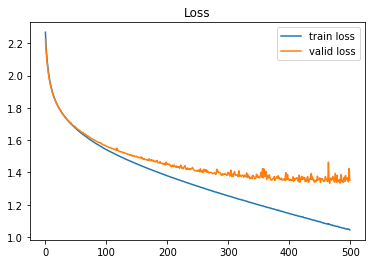

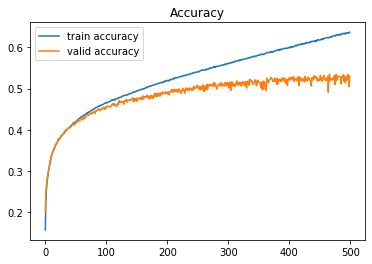

In [7]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()